# Importing the dependecies

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading the Dataset

In [3]:
df=pd.read_csv('autism.csv')

# Understanding the data

In [4]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [6]:
df.head()
df['ethnicity'].unique()

array(['?', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Others', 'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino',
       'others'], dtype=object)

In [7]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [8]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


# Observation 
ID - ID of the patient

A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

age - Age of the patient in years

gender - Gender of the patient

ethnicity - Ethnicity of the patient

jaundice - Whether the patient had jaundice at the time of birth

autism - Whether an immediate family member has been diagnosed with autism

contry_of_res - Country of residence of the patient

used_app_before - Whether the patient has undergone a screening test before

result - Score for AQ1-10 screening test

age_desc - Age of the patient

relation - Relation of patient who completed the test

Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

# Data cleaning

In [9]:
df.duplicated().any()

np.False_

In [10]:
df=df.drop(columns=['age_desc','ID'])

In [11]:
df.columns = df.columns.str.strip()
df.rename(columns={'contry_of_res': 'country_of_res', 'austim': 'autism','Class/ASD':'target'},inplace=True)

In [12]:
df['gender'].unique()
df['gender']=df['gender'].replace({'f':'Female','m':'Male'})

In [13]:
df['jaundice'] = df['jaundice'].map({'yes':1, 'no':0})
df['autism'] = df['autism'].map({'yes':1, 'no':0})
df['used_app_before'] = df['used_app_before'].map({'yes':1, 'no':0})


In [14]:
df['age'] = df['age'].astype(int)

# Data preprocessing / Feature engineering

In [15]:
df['result'].round(2).unique()

array([ 6.35,  2.26, 14.85,  2.28, -4.78,  9.56,  7.98, 13.24, -1.76,
       14.92, 13.84, 10.73,  0.78, 14.45,  9.8 ,  4.78,  6.5 , -4.1 ,
        1.13, 12.29, 14.  , 13.92,  5.09, 13.69,  5.82,  2.4 ,  7.06,
       -2.61,  9.61, 15.77, 13.19,  2.41,  5.41, 11.65, 10.65, 15.11,
       10.83, 13.41,  3.45, 11.35,  7.39, 14.06, 15.08, 15.17,  5.9 ,
       -0.15, 10.76, 12.51, 12.98,  7.16,  2.49, 11.92,  9.06, 10.26,
        1.54,  7.97,  0.6 ,  4.25,  8.63, 13.37,  2.03,  9.54, 14.77,
       13.07,  1.39,  3.97, -5.26, 12.39, 13.56,  0.37, -0.68,  6.85,
        1.03, 12.93,  3.2 , 12.09, 12.16,  6.47,  1.83,  0.25, 11.38,
       13.61, 13.33, 12.36, -0.06, 15.01, 14.13, 11.91,  8.35, 12.46,
        6.7 ,  7.81, 13.02,  7.17, 10.42, 12.04,  6.93,  1.69, 13.35,
        0.52,  7.69, 14.32,  9.44, 12.81, 13.45, 13.01,  8.58, 13.83,
        6.12, 12.58, 12.62, 13.12, 12.25,  8.91, 10.64, 13.38,  3.61,
        9.95,  5.23, 10.75, 14.43, 12.42,  8.71,  8.9 , 14.81, 11.51,
       12.66, -1.36,

In [16]:
mapping={'Viet Nam':'Vietnam',
         'AmericanSamoa':'United States',
         'Hong Kong':'China'}

df['country_of_res']=df['country_of_res'].replace(mapping)

In [17]:
df['relation']=df['relation'].replace({'Relative':'Others','Parent':'Others','?':'Others','Health care professional':'Others'})

In [18]:
df['ethnicity'].unique()
df['ethnicity']=df['ethnicity'].replace({'?':'Others','others':'Others'})

In [19]:
df['age'].min()
df['age_cat']=pd.cut(df['age'],bins=[0,15,25,60,89],labels=['child','teen','adult','senior'])

# Data analysis

How many individuals are classified as ASD positive vs ASD negative?


In [20]:
df['target'].value_counts()

target
0    639
1    161
Name: count, dtype: int64

What is the average and median Total Screening Score (A1–A10) for ASD positive vs ASD negative individuals?


In [21]:
df["Total_Screening_Score"] = df[["A1_Score","A2_Score","A3_Score","A4_Score","A5_Score","A6_Score","A7_Score","A8_Score","A9_Score","A10_Score"]].sum(axis=1)

result = df.groupby("target")["Total_Screening_Score"].agg(["mean", "median"]).reset_index()
result


,target,mean,median
0,0,3.636933,3.0
1,1,8.782609,9.0


Is there a noticeable gender difference in ASD classification?

In [22]:
df.groupby('gender')['target'].value_counts()

gender  target
Female  0         215
        1          55
Male    0         424
        1         106
Name: count, dtype: int64

What is the relationship between Age and ASD classification?

In [23]:
df.groupby('age_cat')['target'].value_counts()

D:\\ipykernel_19072\1947481954.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_cat')['target'].value_counts()


age_cat  target
child    0         147
         1          29
teen     0         216
         1          38
adult    0         244
         1          82
senior   0          32
         1          12
Name: count, dtype: int64

Does family history of autism increase the likelihood of ASD classification?

In [24]:
df.groupby('autism')['target'].value_counts()

autism  target
0       0         577
        1          92
1       1          69
        0          62
Name: count, dtype: int64

Among individuals with ASD positive, what is the most common age, gender, and family history combination?

In [25]:
asd_pos=df.query("target==1")
asd_pos[['age', 'gender', 'autism']].mode()

,age,gender,autism
0,31,Male,0


Are individuals with a family history and high screening score (>6) almost always ASD positive?

In [26]:
df['high_score'] = df['Total_Screening_Score'] > 6
df.groupby(['autism','high_score'])['target'].mean()


autism  high_score
0       False         0.033797
        True          0.451807
1       False         0.111111
        True          0.592920
Name: target, dtype: float64

Are there individuals who scored 10/10 in screening but are labeled negative? If yes, how many?

In [27]:
df[(df['Total_Screening_Score']==10) & (df['target']==0)].shape[0]


26

What proportion of ASD positive cases were reported as “self” vs “others”?


In [28]:
asd_pos=df.query("target==1")
asd_pos['relation'].value_counts()

relation
Self      147
Others     14
Name: count, dtype: int64

# EDA

Count of autistic and non-autistic 

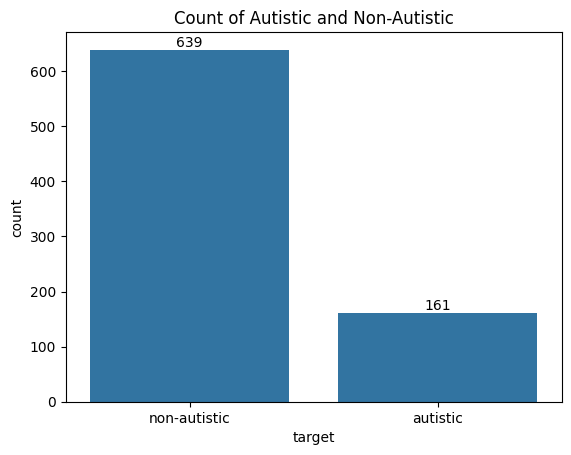

In [29]:
a=sns.countplot(df,x='target')
a.bar_label(a.containers[0])
a.set_xticks(ticks=[0,1],labels=['non-autistic','autistic'])
plt.title('Count of Autistic and Non-Autistic')
plt.show()

Age distribution by target:

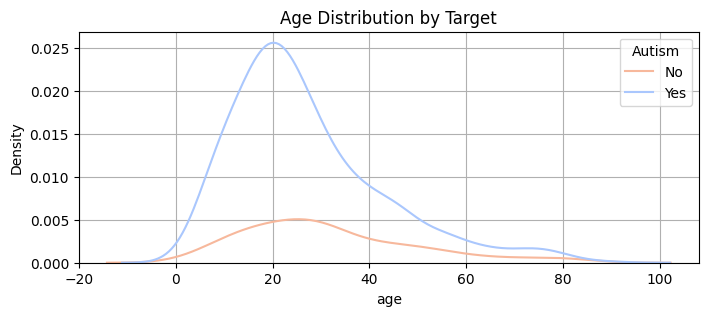

In [30]:
plt.figure(figsize=(8,3))
sns.kdeplot(df,x='age',hue='target',palette='coolwarm')
plt.legend(title="Autism", labels=["No", "Yes"])
plt.title('Age Distribution by Target')
plt.grid()
plt.show()

OBSERVATION:People falling under the age from 10 to 30 are more prone to be autistic..Specially peaked at teenage

Gender vs target

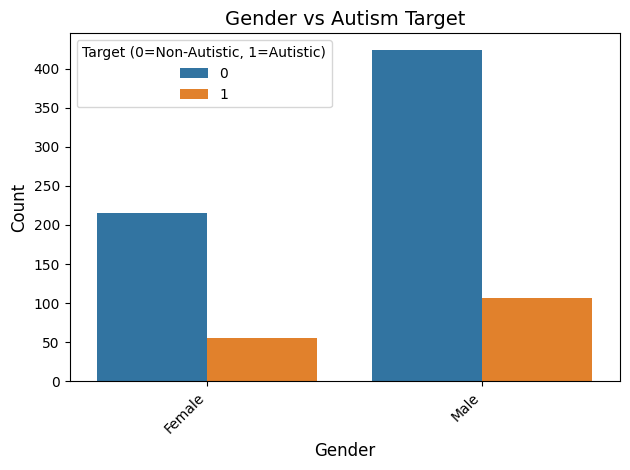

In [31]:
sns.countplot(df,x='gender',hue='target')
plt.title("Gender vs Autism Target", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Target (0=Non-Autistic, 1=Autistic)")
plt.tight_layout()
plt.show()

OBSERVATION : Male count of being autistic is more than female

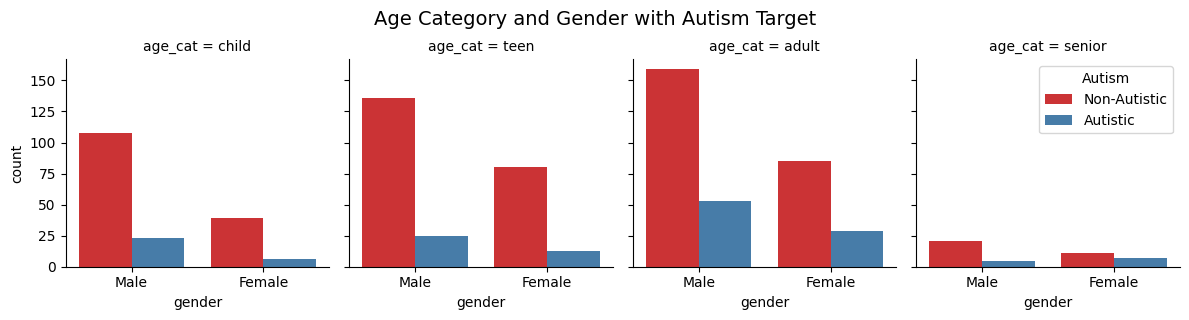

In [32]:
fg=sns.FacetGrid(df,col='age_cat')
fg.map_dataframe(sns.countplot,x='gender',hue='target',hue_order=[0,1],palette='Set1')
plt.legend(title='Autism',labels=['Non-Autistic','Autistic'])
fg.fig.suptitle('Age Category and Gender with Autism Target', fontsize=14, y=1.05)
plt.show()

Ethnicity vs target

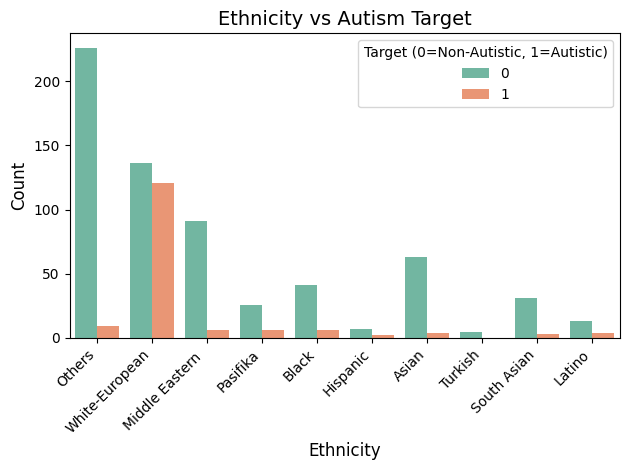

In [33]:
sns.countplot(data=df, x="ethnicity", hue="target", palette="Set2")

plt.title("Ethnicity vs Autism Target", fontsize=14)
plt.xlabel("Ethnicity", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Target (0=Non-Autistic, 1=Autistic)")
plt.tight_layout()
plt.show()

OBSERVATION: White Europeans are high in count of being autistic

Country vs target

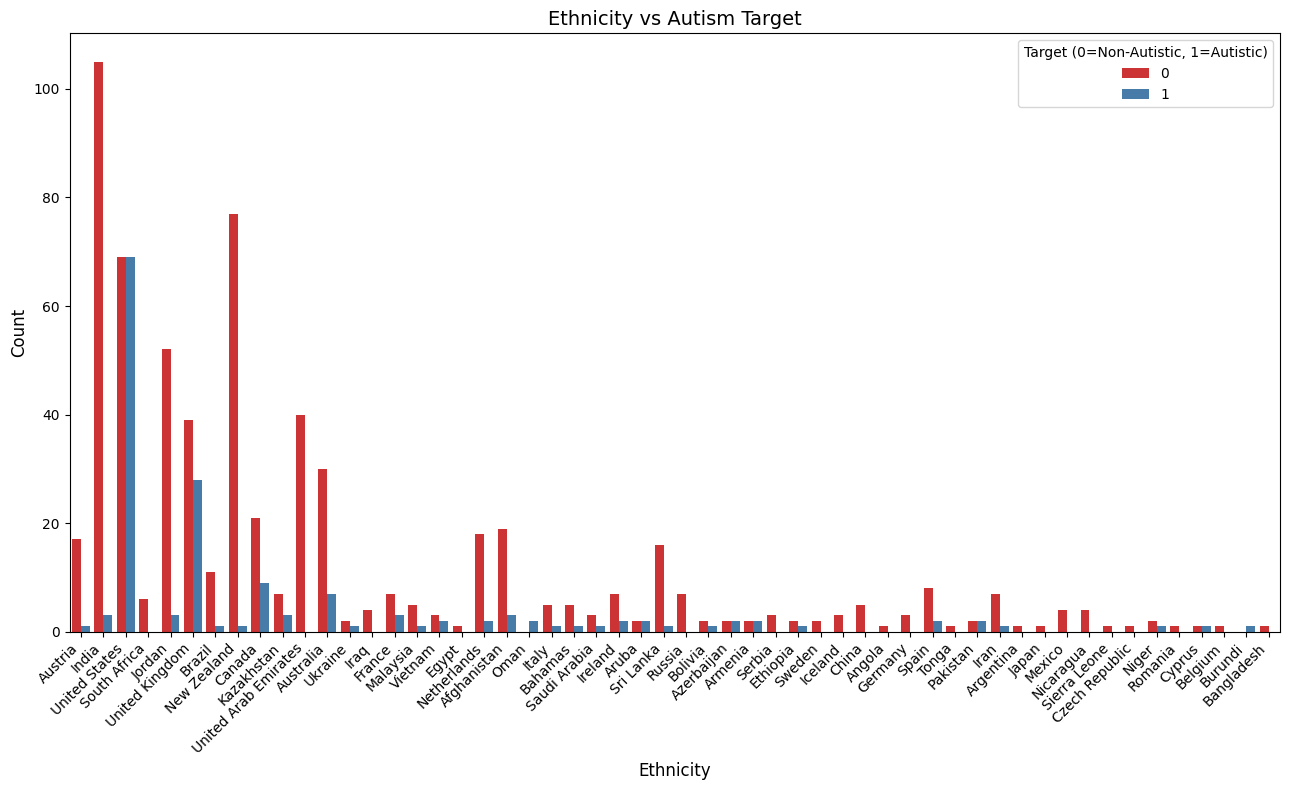

In [34]:
plt.figure(figsize=(13,8))
sns.countplot(data=df, x="country_of_res", hue="target", palette="Set1")
plt.title("Ethnicity vs Autism Target", fontsize=14)
plt.xlabel("Ethnicity", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Target (0=Non-Autistic, 1=Autistic)")
plt.tight_layout()
plt.show()

OBSERVATION:

 In US if 10 people attend the test then 5 people being autistic is a posibilty

Correlation 

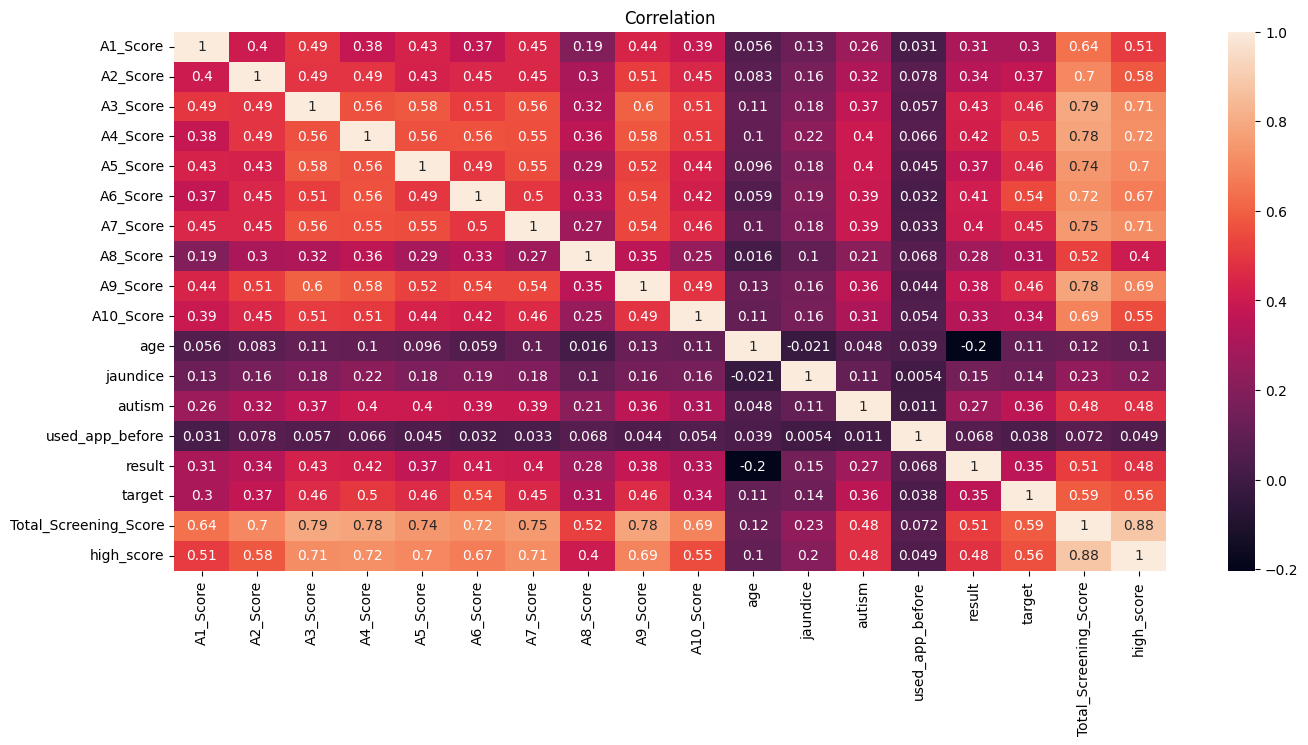

In [51]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title("Correlation")
plt.show()

Jaundice vs target

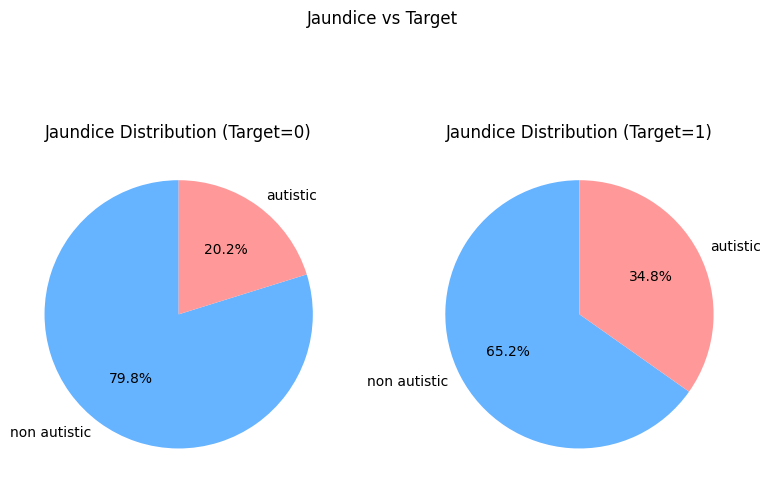

In [46]:
jaundice_target = df.groupby(['jaundice','target']).size().unstack()

fig, axes = plt.subplots(1, 2, figsize=(8,6))

for i, target in enumerate(jaundice_target.columns):
    counts = jaundice_target[target]
    counts.index=['non autistic','autistic']

    axes[i].pie(
        counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#66b3ff','#ff9999']
    )
    axes[i].set_title(f"Jaundice Distribution (Target={target})")

fig.suptitle('Jaundice vs Target')
plt.tight_layout()
plt.show()


OBSERVATION:

people having jaundice cannot be considered as autistic ..atleast in 75% of the case

Family background autism vs target

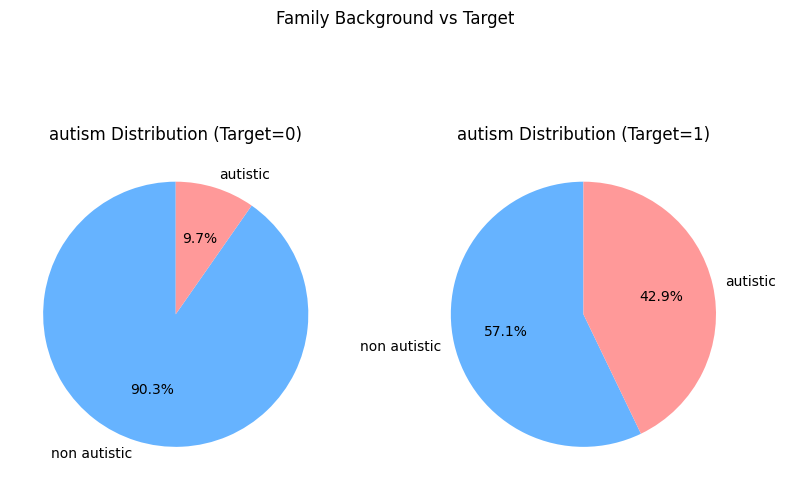

In [52]:
autism_target = df.groupby(['autism','target']).size().unstack()

fig, axes = plt.subplots(1, 2, figsize=(8,6))

for i, target in enumerate(autism_target.columns):
    counts = autism_target[target]
    counts.index=['non autistic','autistic']
    axes[i].pie(
        counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#66b3ff','#ff9999']
    )
    axes[i].set_title(f"autism Distribution (Target={target})")
fig.suptitle('Family Background vs Target')
plt.tight_layout()
plt.show()

OBSERVATION:If someone in the patient family has autism then he is most likely to be autistic

Relation and Total_Screening_score wrt target

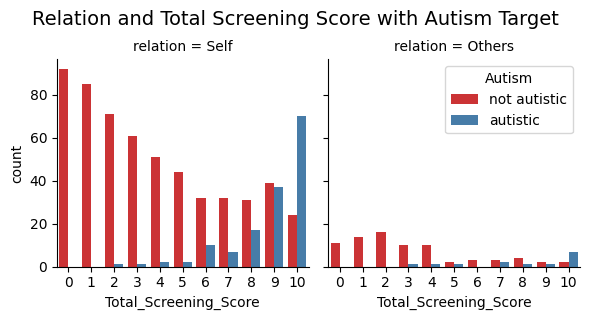

In [49]:
fg=sns.FacetGrid(df,col='relation')
fg.map_dataframe(sns.countplot,x='Total_Screening_Score',hue='target',hue_order=[0,1],palette='Set1')
fg.fig.suptitle('Relation and Total Screening Score with Autism Target', fontsize=14, y=1.05)
plt.legend(title='Autism',labels=['not autistic','autistic'],loc='upper right')
plt.show()

OBSERVATION:

If the test is attended by the patient itself and if total_screening_score is greater than 7 then they being autistic is a possibility

# Conclusion

Based on the data analysis, we can conclude the following:



1.Individuals with higher Total Screening Scores are more likely to be classified as having Autism Spectrum Disorder (ASD).

2.Age: ASD likelihood does not depend strongly on age in this dataset.

3.Gender: Slight imbalance exists (more males screened), but ASD presence is not limited to one gender.

4.Relation: When the screening is filled by self, scores tend to be higher compared to those filled by parents/others, showing that self-reporting may better capture symptoms.

5.Jaundice history showed some variations, but it is not a strong predictor of ASD in this dataset.
